In [1]:
import pandas as pd
import numpy as np
import h5py
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow.keras import backend as K
import warnings

warnings.filterwarnings('ignore')

In [2]:
path_single = r'D:\btech\megathon\gee\landslide\TrainData\img\image_2000.h5'
path_single_mask = r'D:\btech\megathon\gee\landslide\TrainData\mask\mask_2000.h5'

ls ['img']
input data shape: (128, 128, 14)


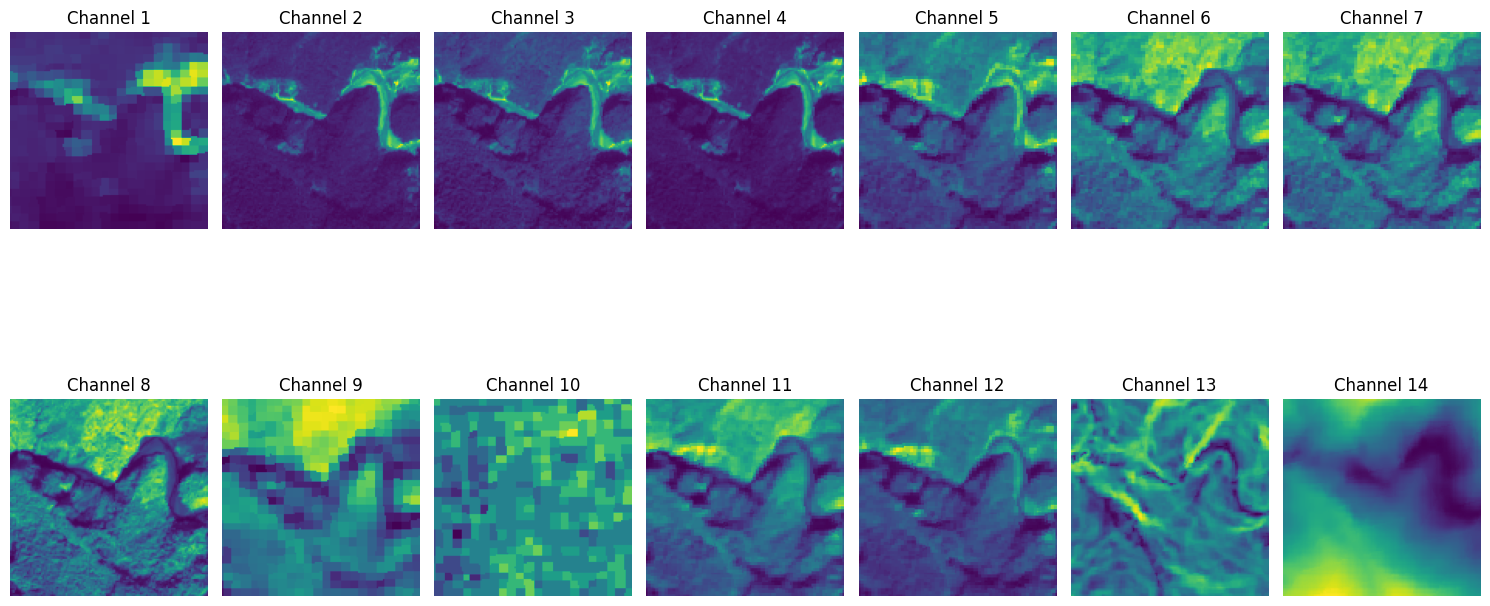

In [3]:
f_data = np.zeros((1, 128,128, 3))
with h5py.File(path_single, 'r') as hdf:
    ls = list(hdf.keys())
    print("ls", ls)
    data = np.array(hdf.get('img'))
    print("input data shape:", data.shape)
    
    fig, axes = plt.subplots(2, 7, figsize=(15, 9))
    axes = axes.ravel()

    for i in range(14):
        ax = axes[i]
        ax.imshow(data[:, :, i])
        ax.set_title(f"Channel {i+1}")
        ax.axis('off')

    plt.tight_layout()
    plt.show()

ls ['mask']
input data shape: (128, 128)


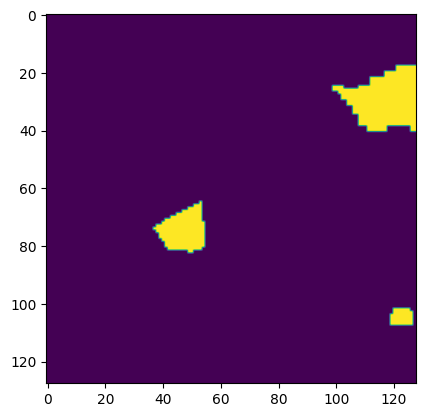

In [4]:
with h5py.File(path_single_mask) as hdf:
    ls = list(hdf.keys())
    print("ls", ls)
    data = np.array(hdf.get('mask'))
    print("input data shape:", data.shape)
    plt.imshow(data)

In [5]:
path_single = r'D:\btech\megathon\gee\landslide\TrainData\img\image_10.h5'
path_single_mask = r'D:\btech\megathon\gee\landslide\TrainData\mask\mask_1.h5'
TRAIN_PATH = r'D:\btech\megathon\gee\landslide\TrainData\img\*.h5'
TRAIN_MASK = r'D:\btech\megathon\gee\landslide\TrainData\mask\*.h5'

TRAIN_XX = np.zeros((3799, 128, 128, 6))
TRAIN_YY = np.zeros((3799, 128, 128, 1))
all_train = sorted(glob.glob(TRAIN_PATH))
all_mask = sorted(glob.glob(TRAIN_MASK))

In [6]:
import tensorflow as tf
tf.test.gpu_device_name()

''

In [7]:
for i, (img, mask) in enumerate(zip(all_train, all_mask)):
    print(i, img, mask)
    with h5py.File(img) as hdf:
        ls = list(hdf.keys())
        data = np.array(hdf.get('img'))

        data[np.isnan(data)] = 0.000001

        mid_rgb = data[:, :, 1:4].max() / 2.0
        mid_slope = data[:, :, 12].max() / 2.0
        mid_elevation = data[:, :, 13].max() / 2.0

        data_red = data[:, :, 3]
        data_nir = data[:, :, 7]
        data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))
        
        TRAIN_XX[i, :, :, 0] = 1 - data[:, :, 3] / mid_rgb  
        TRAIN_XX[i, :, :, 1] = 1 - data[:, :, 2] / mid_rgb 
        TRAIN_XX[i, :, :, 2] = 1 - data[:, :, 1] / mid_rgb 
        TRAIN_XX[i, :, :, 3] = data_ndvi 
        TRAIN_XX[i, :, :, 4] = 1 - data[:, :, 12] / mid_slope 
        TRAIN_XX[i, :, :, 5] = 1 - data[:, :, 13] / mid_elevation 
    
    
    with h5py.File(mask) as hdf:
        ls = list(hdf.keys())
        data=np.array(hdf.get('mask'))
        TRAIN_YY[i, :, :, 0] = data

0 D:\btech\megathon\gee\landslide\TrainData\img\image_1.h5 D:\btech\megathon\gee\landslide\TrainData\mask\mask_1.h5
1 D:\btech\megathon\gee\landslide\TrainData\img\image_10.h5 D:\btech\megathon\gee\landslide\TrainData\mask\mask_10.h5
2 D:\btech\megathon\gee\landslide\TrainData\img\image_100.h5 D:\btech\megathon\gee\landslide\TrainData\mask\mask_100.h5
3 D:\btech\megathon\gee\landslide\TrainData\img\image_1000.h5 D:\btech\megathon\gee\landslide\TrainData\mask\mask_1000.h5
4 D:\btech\megathon\gee\landslide\TrainData\img\image_1001.h5 D:\btech\megathon\gee\landslide\TrainData\mask\mask_1001.h5
5 D:\btech\megathon\gee\landslide\TrainData\img\image_1002.h5 D:\btech\megathon\gee\landslide\TrainData\mask\mask_1002.h5
6 D:\btech\megathon\gee\landslide\TrainData\img\image_1003.h5 D:\btech\megathon\gee\landslide\TrainData\mask\mask_1003.h5
7 D:\btech\megathon\gee\landslide\TrainData\img\image_1004.h5 D:\btech\megathon\gee\landslide\TrainData\mask\mask_1004.h5
8 D:\btech\megathon\gee\landslide\Tr

In [8]:
TRAIN_XX[np.isnan(TRAIN_XX)] = 0.000001
print(TRAIN_XX.min(), TRAIN_XX.max(), TRAIN_YY.min(), TRAIN_YY.max())

-1.0 1.0 0.0 1.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


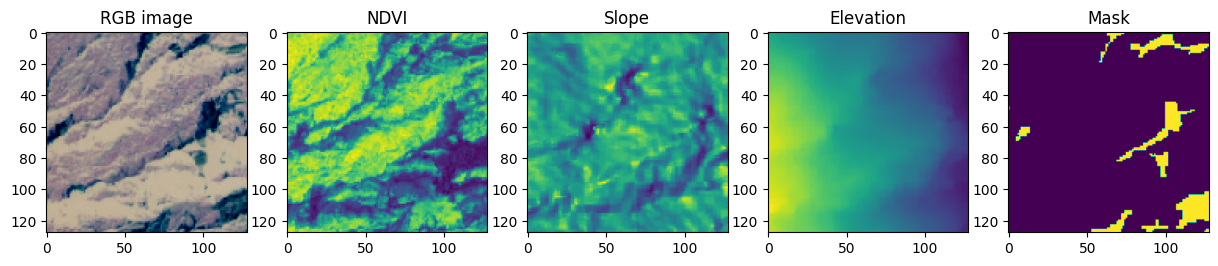

In [9]:
img=234
fig,(ax1,ax2, ax3, ax4, ax5)= plt.subplots(1,5,figsize=(15,10))

ax1.set_title("RGB image")
ax2.set_title("NDVI")
ax3.set_title("Slope")
ax4.set_title("Elevation")
ax5.set_title("Mask")
ax1.imshow(TRAIN_XX[img, :, :, 0:3])
ax2.imshow(TRAIN_XX[img, :, :, 3])
ax3.imshow(TRAIN_XX[img, :, :, 4])
ax4.imshow(TRAIN_XX[img, :, :, 5])
ax5.imshow(TRAIN_YY[img, :, :, 0])

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(TRAIN_XX, TRAIN_YY, test_size=0.2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


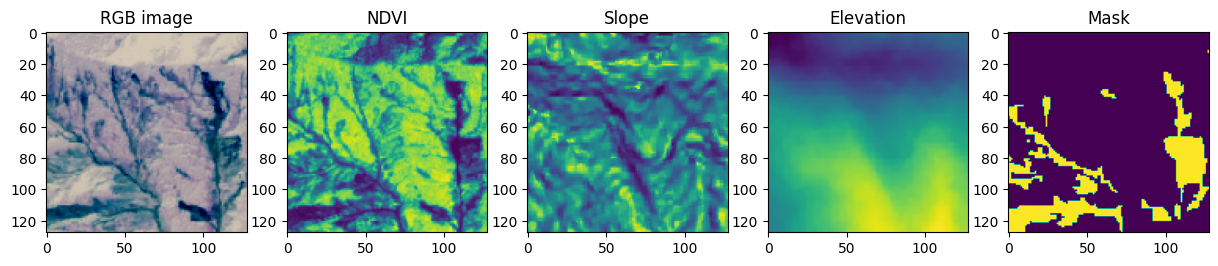

In [11]:
img=1545
fig,(ax1,ax2, ax3, ax4, ax5)= plt.subplots(1,5,figsize=(15,10))

ax1.set_title("RGB image")
ax2.set_title("NDVI")
ax3.set_title("Slope")
ax4.set_title("Elevation")
ax5.set_title("Mask")
ax1.imshow(x_train[img, :, :, 0:3])
ax2.imshow(x_train[img, :, :, 3])
ax3.imshow(x_train[img, :, :, 4])
ax4.imshow(x_train[img, :, :, 5])
ax5.imshow(y_train[img, :, :, 0])

In [12]:
del TRAIN_XX
del TRAIN_YY
del all_train
del all_mask 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


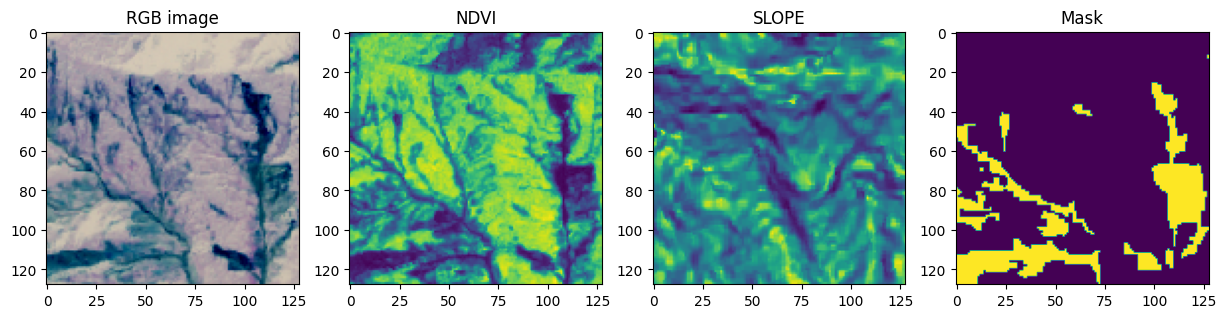

In [13]:
img=1545
fig,(ax1,ax2, ax3, ax4)= plt.subplots(1,4,figsize=(15,10))


ax1.set_title("RGB image")
ax2.set_title("NDVI")
ax3.set_title("SLOPE")
ax4.set_title("Mask")
ax1.imshow(x_train[img, :, :, 0:3])
ax2.imshow(x_train[img, :, :, 3])
ax3.imshow(x_train[img, :, :, 4])
ax4.imshow(y_train[img, :, :, 0])

In [14]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

# precision
def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

#f1 score
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [15]:
def unet_model(IMG_WIDTH, IMG_HIGHT, IMG_CHANNELS):
    inputs = tf.keras.layers.Input((IMG_WIDTH, IMG_HIGHT, IMG_CHANNELS))

    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(inputs)
    c1 = tf.keras.layers.Dropout(0.1)(c1)
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = tf.keras.layers.Dropout(0.1)(c2)
    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = tf.keras.layers.Dropout(0.2)(c3)
    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)

    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = tf.keras.layers.Dropout(0.2)(c4)
    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)

    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = tf.keras.layers.Dropout(0.3)(c5)
    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)


    u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = tf.keras.layers.concatenate([u6, c4])
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = tf.keras.layers.Dropout(0.2)(c6)
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

    u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = tf.keras.layers.concatenate([u7, c3])
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = tf.keras.layers.Dropout(0.2)(c7)
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

    u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = tf.keras.layers.concatenate([u8, c2])
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = tf.keras.layers.Dropout(0.1)(c8)
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

    u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = tf.keras.layers.Dropout(0.1)(c9)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

    outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', f1_m, precision_m, recall_m])
    
    return model

In [16]:
model = unet_model(128, 128, 6)
checkpointer = tf.keras.callbacks.ModelCheckpoint("best_model.keras", verbose=2, save_best_only=True, mode="max")

callbacks = [
    checkpointer
    ]
history = model.fit(x_train, y_train, batch_size=16,  
          epochs=15, 
          verbose = 2,
          validation_data=(x_valid, y_valid),
          callbacks=callbacks)

model.save("model_save.keras")

Epoch 1/15

Epoch 1: val_loss improved from -inf to 0.04305, saving model to best_model.keras
190/190 - 72s - 380ms/step - accuracy: 0.9759 - f1_m: 0.3328 - loss: 0.0727 - precision_m: 0.5850 - recall_m: 0.2788 - val_accuracy: 0.9845 - val_f1_m: 0.5366 - val_loss: 0.0430 - val_precision_m: 0.7025 - val_recall_m: 0.4591
Epoch 2/15

Epoch 2: val_loss did not improve from 0.04305
190/190 - 67s - 352ms/step - accuracy: 0.9832 - f1_m: 0.5730 - loss: 0.0459 - precision_m: 0.7046 - recall_m: 0.5063 - val_accuracy: 0.9856 - val_f1_m: 0.6236 - val_loss: 0.0390 - val_precision_m: 0.6601 - val_recall_m: 0.6124
Epoch 3/15

Epoch 3: val_loss did not improve from 0.04305
190/190 - 67s - 353ms/step - accuracy: 0.9848 - f1_m: 0.6096 - loss: 0.0408 - precision_m: 0.7335 - recall_m: 0.5371 - val_accuracy: 0.9858 - val_f1_m: 0.6197 - val_loss: 0.0361 - val_precision_m: 0.6755 - val_recall_m: 0.5956
Epoch 4/15

Epoch 4: val_loss did not improve from 0.04305
190/190 - 67s - 352ms/step - accuracy: 0.9845 - 

In [17]:
loss, accuracy, f1_score, precision, recall = model.evaluate(x_valid, y_valid, verbose=0)
print(loss, accuracy, f1_score, precision, recall)

0.02730827033519745 0.9890874028205872 0.7165535092353821 0.7692181468009949 0.6743605136871338


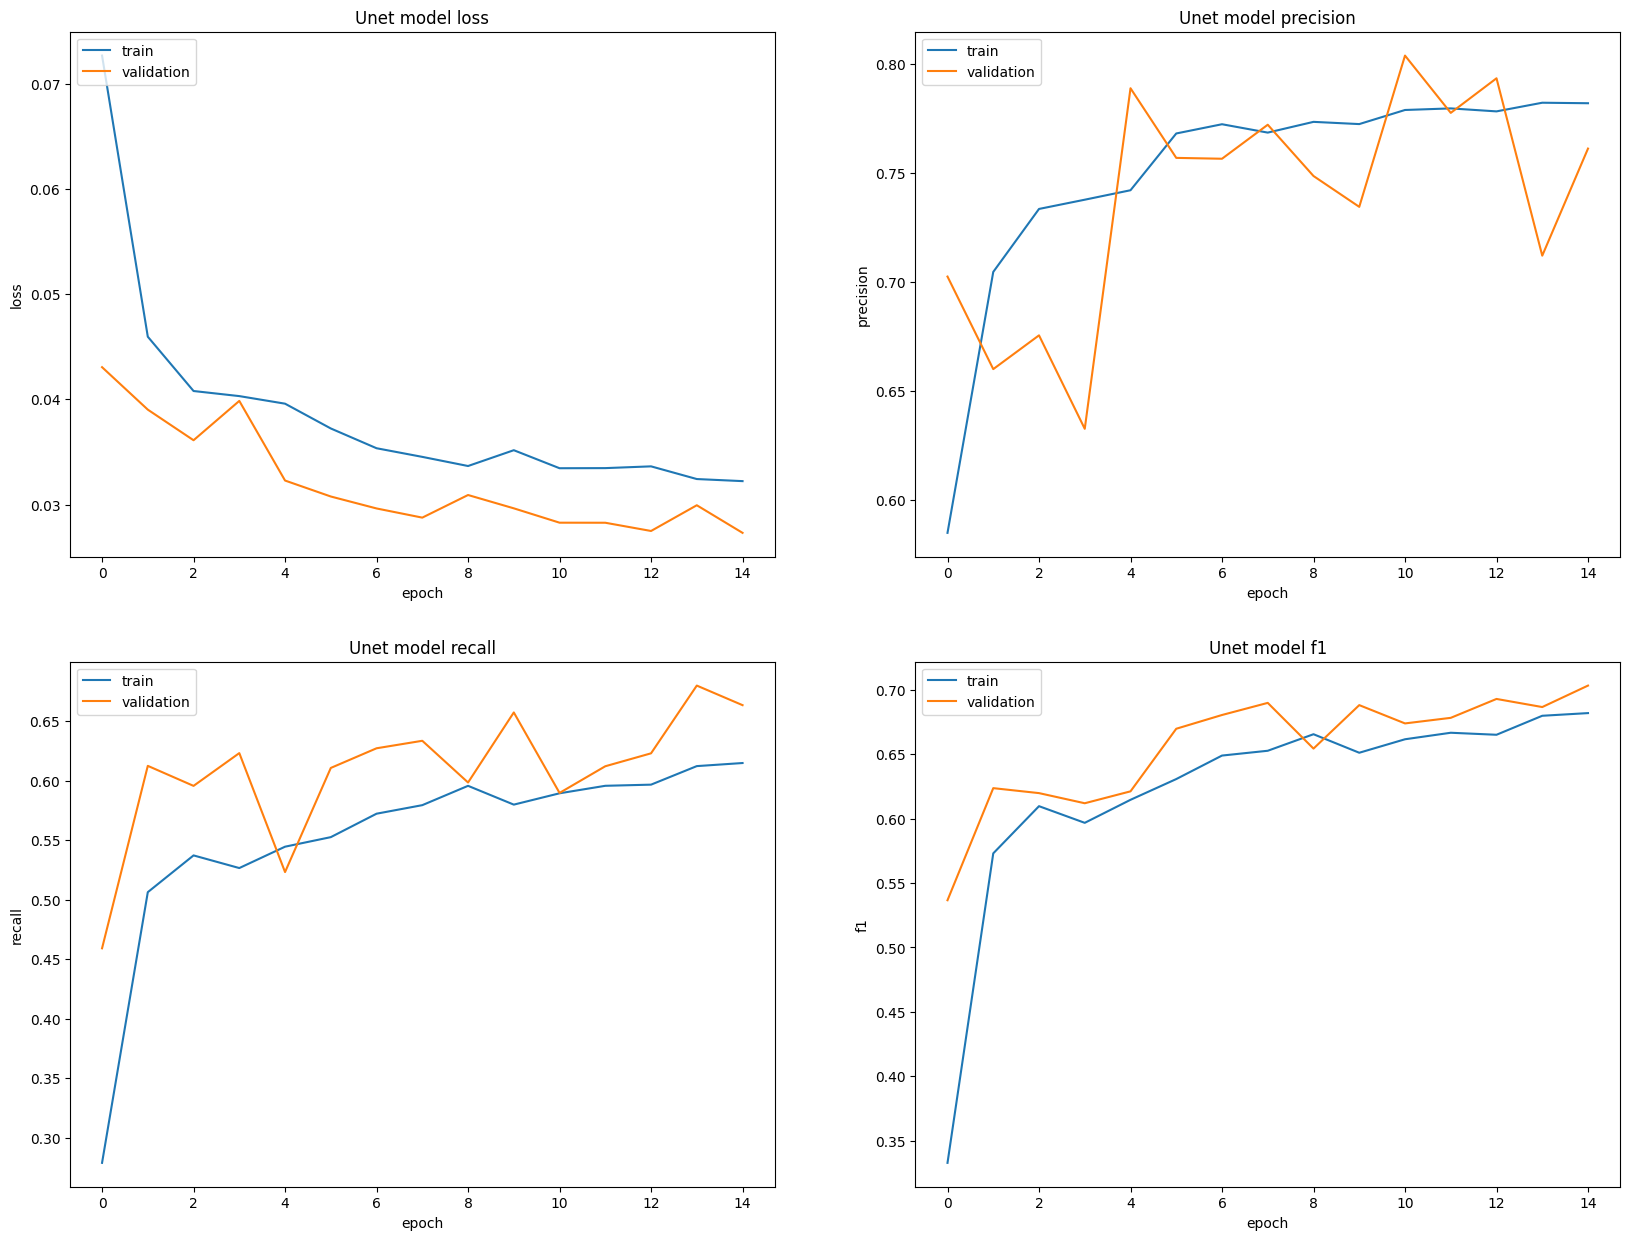

In [18]:
fig,((ax11,ax12),(ax13,ax14)) = plt.subplots(2,2,figsize=(20,15))
ax11.plot(history.history['loss'])
ax11.plot(history.history['val_loss'])
ax11.title.set_text('Unet model loss')
ax11.set_ylabel('loss')
ax11.set_xlabel('epoch')
ax11.legend(['train', 'validation'], loc='upper left')

ax12.plot(history.history['precision_m'])
ax12.plot(history.history['val_precision_m'])
ax12.set_title('Unet model precision')
ax12.set_ylabel('precision')
ax12.set_xlabel('epoch')
ax12.legend(['train', 'validation'], loc='upper left')

ax13.plot(history.history['recall_m'])
ax13.plot(history.history['val_recall_m'])
ax13.set_title('Unet model recall')
ax13.set_ylabel('recall')
ax13.set_xlabel('epoch')
ax13.legend(['train', 'validation'], loc='upper left')

ax14.plot(history.history['f1_m'])
ax14.plot(history.history['val_f1_m'])
ax14.set_title('Unet model f1')
ax14.set_ylabel('f1')
ax14.set_xlabel('epoch')
ax14.legend(['train', 'validation'], loc='upper left')

In [19]:
threshold = 0.5
pred_img = model.predict(x_valid)
pred_img = (pred_img > threshold).astype(np.uint8)

24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 187ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Training Image')

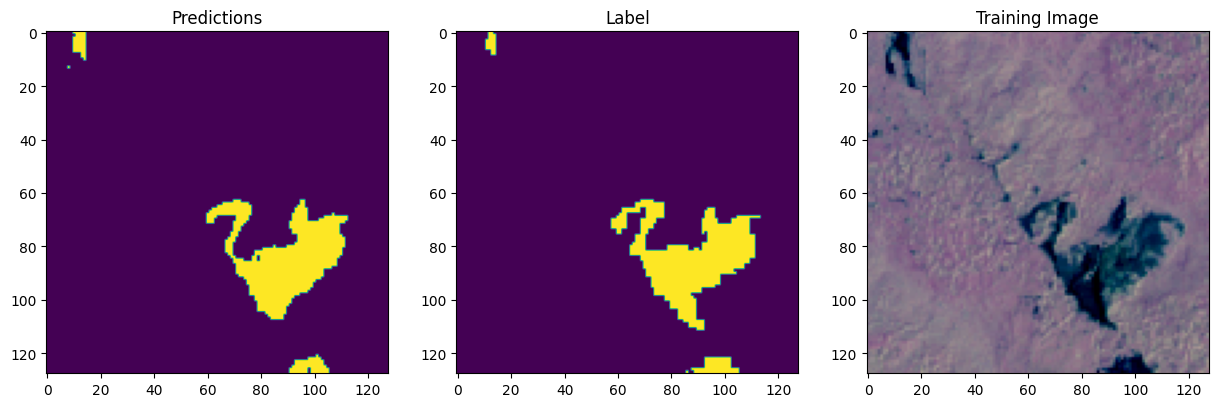

In [20]:
img = 155
fig,(ax1,ax2,ax3)= plt.subplots(1,3,figsize=(15,10))
ax1.imshow(pred_img[img, :, :, 0])
ax1.set_title("Predictions")
ax2.imshow(y_valid[img, :, :, 0])
ax2.set_title("Label")
ax3.imshow(x_valid[img, :, :, 0:3])
ax3.set_title('Training Image')

In [21]:
import ee
import geemap
import datetime



In [22]:
ee.Authenticate()

True

In [23]:
ee.Initialize(project='ee-tejaswinisingh216')
print("Google Earth Engine is initialized and ready to use!")

Google Earth Engine is initialized and ready to use!


In [41]:
# Location of interest (latitude and longitude)
latitude = 28.3949  # Example: coordinates for Nepal
longitude = 84.1240

# Date range
end_date = datetime.date.today()
start_date = end_date - datetime.timedelta(days=30)  # Past 30 days


In [42]:
# Define an Area of Interest (AOI) around the location
aoi = ee.Geometry.Point([longitude, latitude]).buffer(5000)  # 5 km buffer around point

# Get Sentinel-2 imagery
collection = (ee.ImageCollection("COPERNICUS/S2")
              .filterBounds(aoi)
              .filterDate(str(start_date), str(end_date))
              .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 10))  # Limit cloud cover to 10%
              .select(['B4', 'B3', 'B2']))  # RGB bands


In [26]:
# Get the most recent image
recent_image = collection.sort('system:time_start', False).first()

# Get image metadata (Optional)
info = recent_image.getInfo()
print("Image metadata:", info)

# Visualize the image using geemap
Map = geemap.Map()
Map.centerObject(aoi, zoom=10)
Map.addLayer(recent_image, {'bands': ['B4', 'B3', 'B2'], 'min': 0, 'max': 3000}, "Sentinel-2 Image")
Map


Image metadata: {'type': 'Image', 'bands': [{'id': 'B4', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 65535}, 'dimensions': [10980, 10980], 'crs': 'EPSG:32644', 'crs_transform': [10, 0, 699960, 0, -10, 3200040]}, {'id': 'B3', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 65535}, 'dimensions': [10980, 10980], 'crs': 'EPSG:32644', 'crs_transform': [10, 0, 699960, 0, -10, 3200040]}, {'id': 'B2', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 65535}, 'dimensions': [10980, 10980], 'crs': 'EPSG:32644', 'crs_transform': [10, 0, 699960, 0, -10, 3200040]}], 'version': 1729932734586754, 'id': 'COPERNICUS/S2/20241026T045819_20241026T050229_T44RQS', 'properties': {'DATATAKE_IDENTIFIER': 'GS2B_20241026T045819_039899_N05.11', 'SPACECRAFT_NAME': 'Sentinel-2B', 'RADIO_ADD_OFFSET_B8A': -1000, 'MEAN_INCIDENCE_AZIMUTH_ANGLE_B8A': 105.75845633973, 'RADIO_ADD_OFFSET_B10': -1000, 'MEAN_SOLAR_AZIMUTH_ANGLE': 158.958492768098, 'syst

Map(center=[28.39490512944125, 84.12400016170126], controls=(WidgetControl(options=['position', 'transparent_b…

In [27]:
import geemap
import numpy as np
from PIL import Image  # For displaying images


In [36]:
import numpy as np

from PIL import Image  # Make sure to import Image from PIL

# Define a function to get the image as a numpy array
def get_image_array(image, region, bands=['B4', 'B3', 'B2'], scale=10):
    # Reduce the image to RGB bands and select area
    rgb_image = image.select(bands)
    
    # Reduce the region to get pixel values
    pixel_values = rgb_image.reduceRegion(
        reducer=ee.Reducer.mean(),
        geometry=region,
        scale=scale,
        maxPixels=1e9
    ).getInfo()

    # Convert the pixel values into a NumPy array
    array = np.array([pixel_values[band] for band in bands])
    
    # Reshape to (1, 1, 3) to simulate a single pixel with RGB bands
    return array.reshape((1, 1, len(bands)))

# Define preprocessing steps
def preprocess_image_array(array):
    # Normalize the pixel values to [0, 1] if required by your model
    array = array / 3000.0  # Sentinel-2 range

    # Resize to model input shape if needed
    # Assuming the model expects 256x256 input, use nearest-neighbor resizing
    resized_image = np.array(Image.fromarray((array * 255).astype(np.uint8)).resize((128, 128), Image.NEAREST))
    
    # If your model expects 6 channels, you may need to duplicate or create additional channels
    if resized_image.shape[-1] == 3:  # If it's RGB
        # Assuming the last channel is the same for simplicity
        resized_image = np.concatenate([resized_image, resized_image[:, :, -1:]], axis=-1)

    # Convert to float32 for model compatibility
    return resized_image.astype(np.float32) / 255.0  # Normalize to [0,1]

# Test the preprocessing with the recent image
# Replace `recent_image` and `aoi` with the variables you have set for your image and region
# recent_image should be an ee.Image and aoi should be an ee.Geometry
array = get_image_array(recent_image, aoi)

# Preprocess for prediction
preprocessed_image = preprocess_image_array(array)

# Display or use in your model
print("Preprocessed image shape:", preprocessed_image.shape)  # Should be (256, 256, 3)


Preprocessed image shape: (128, 128, 4)


In [46]:
# Ensure the preprocessed image has 3 channels (RGB)
if preprocessed_image.shape[-1] == 4:  # If RGBA
    preprocessed_image = preprocessed_image[..., :3]  # Convert to RGB

# Normalize image if needed
preprocessed_image = preprocessed_image / 3000.0  # Scale pixel values to [0, 1]

# Expand dimensions of the preprocessed image to match the model input shape
input_image = np.expand_dims(preprocessed_image, axis=0)  # Shape becomes (1, height, width, 3)

# Use the model to predict the landslide risk
predictions = model.predict(input_image)

# The output depends on your model's architecture
threshold = 0.5  # Adjust this based on your model's output range
predicted_class = (predictions[0] > threshold).astype(np.uint8)

# Display the prediction result
print("Predicted class (0: No landslide, 1: Landslide):", predicted_class)
print("Predicted probabilities:", predictions[0])

InvalidArgumentError: Graph execution error:

Detected at node convolution defined at (most recent call last):
<stack traces unavailable>
Depth of input must be a multiple of depth of filter: 3 vs 6

Stack trace for op definition: 
File "<frozen runpy>", line 198, in _run_module_as_main
File "<frozen runpy>", line 88, in _run_code
File "C:\Users\tejaswini\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
File "C:\Users\tejaswini\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance
File "C:\Users\tejaswini\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 739, in start
File "C:\Users\tejaswini\AppData\Roaming\Python\Python312\site-packages\tornado\platform\asyncio.py", line 205, in start
File "c:\Program Files\Python312\Lib\asyncio\base_events.py", line 639, in run_forever
File "c:\Program Files\Python312\Lib\asyncio\base_events.py", line 1985, in _run_once
File "c:\Program Files\Python312\Lib\asyncio\events.py", line 88, in _run
File "C:\Users\tejaswini\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue
File "C:\Users\tejaswini\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelbase.py", line 534, in process_one
File "C:\Users\tejaswini\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell
File "C:\Users\tejaswini\AppData\Roaming\Python\Python312\site-packages\ipykernel\ipkernel.py", line 359, in execute_request
File "C:\Users\tejaswini\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelbase.py", line 778, in execute_request
File "C:\Users\tejaswini\AppData\Roaming\Python\Python312\site-packages\ipykernel\ipkernel.py", line 446, in do_execute
File "C:\Users\tejaswini\AppData\Roaming\Python\Python312\site-packages\ipykernel\zmqshell.py", line 549, in run_cell
File "C:\Users\tejaswini\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py", line 3075, in run_cell
File "C:\Users\tejaswini\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py", line 3130, in _run_cell
File "C:\Users\tejaswini\AppData\Roaming\Python\Python312\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
File "C:\Users\tejaswini\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py", line 3334, in run_cell_async
File "C:\Users\tejaswini\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py", line 3517, in run_ast_nodes
File "C:\Users\tejaswini\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code
File "C:\Users\tejaswini\AppData\Local\Temp\ipykernel_7840\1522694220.py", line 8, in <module>
File "C:\Users\tejaswini\AppData\Roaming\Python\Python312\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler
File "C:\Users\tejaswini\AppData\Roaming\Python\Python312\site-packages\keras\src\backend\tensorflow\trainer.py", line 519, in predict
File "C:\Users\tejaswini\AppData\Roaming\Python\Python312\site-packages\keras\src\backend\tensorflow\trainer.py", line 217, in one_step_on_data_distributed
File "C:\Users\tejaswini\AppData\Roaming\Python\Python312\site-packages\keras\src\backend\tensorflow\trainer.py", line 206, in one_step_on_data
File "C:\Users\tejaswini\AppData\Roaming\Python\Python312\site-packages\keras\src\backend\tensorflow\trainer.py", line 98, in predict_step
File "C:\Users\tejaswini\AppData\Roaming\Python\Python312\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler
File "C:\Users\tejaswini\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\layer.py", line 826, in __call__
File "C:\Users\tejaswini\AppData\Roaming\Python\Python312\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler
File "C:\Users\tejaswini\AppData\Roaming\Python\Python312\site-packages\keras\src\ops\operation.py", line 48, in __call__
File "C:\Users\tejaswini\AppData\Roaming\Python\Python312\site-packages\keras\src\utils\traceback_utils.py", line 156, in error_handler
File "C:\Users\tejaswini\AppData\Roaming\Python\Python312\site-packages\keras\src\models\functional.py", line 199, in call
File "C:\Users\tejaswini\AppData\Roaming\Python\Python312\site-packages\keras\src\ops\function.py", line 151, in _run_through_graph
File "C:\Users\tejaswini\AppData\Roaming\Python\Python312\site-packages\keras\src\models\functional.py", line 583, in call
File "C:\Users\tejaswini\AppData\Roaming\Python\Python312\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler
File "C:\Users\tejaswini\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\layer.py", line 826, in __call__
File "C:\Users\tejaswini\AppData\Roaming\Python\Python312\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler
File "C:\Users\tejaswini\AppData\Roaming\Python\Python312\site-packages\keras\src\ops\operation.py", line 48, in __call__
File "C:\Users\tejaswini\AppData\Roaming\Python\Python312\site-packages\keras\src\utils\traceback_utils.py", line 156, in error_handler
File "C:\Users\tejaswini\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py", line 224, in call
File "C:\Users\tejaswini\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py", line 214, in convolution_op
File "C:\Users\tejaswini\AppData\Roaming\Python\Python312\site-packages\keras\src\ops\nn.py", line 909, in conv
File "C:\Users\tejaswini\AppData\Roaming\Python\Python312\site-packages\keras\src\backend\tensorflow\nn.py", line 279, in conv
File "C:\Users\tejaswini\AppData\Roaming\Python\Python312\site-packages\keras\src\backend\tensorflow\nn.py", line 269, in _conv_xla
File "C:\Users\tejaswini\AppData\Roaming\Python\Python312\site-packages\keras\src\backend\tensorflow\nn.py", line 256, in _conv

	 [[{{node convolution}}]]
	tf2xla conversion failed while converting __inference__conv_xla_30729[]. Run with TF_DUMP_GRAPH_PREFIX=/path/to/dump/dir and --vmodule=xla_compiler=2 to obtain a dump of the compiled functions.
	 [[functional_1_1/conv2d_1/StatefulPartitionedCall]] [Op:__inference_one_step_on_data_distributed_31022]